In [158]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv
from sklearn.svm import SVC

#irisData = np.genfromtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', delimiter=",")
irisData = np.genfromtxt('iris.data', delimiter=",")

setosa = irisData[:50,:4]
versicolor = irisData[50:100, :4]
virginica = irisData[100:, :4]



In [218]:
def checkForConvergence(w, inp):
    output = np.matmul(inp, w)
    #print(output)
    if(all(item >= 0 for item in output[:50, :]) and all(item <= 0 for item in output[50:100, :])):
        return True
    if(all(item <= 0 for item in output[:50, :]) and all(item >= 0 for item in output[50:100, :])):
        return True
    return False

#change inputs here
a = np.append(setosa, np.ones((50,1)), axis=1)
b =  np.append(versicolor, np.ones((50,1)), axis=1)
C = 1

loop_num = 0
X = np.vstack([a,b])
Y = np.vstack([np.ones((50, 1)),-np.ones((50, 1))])
weight = np.ones((5,1))
U = np.ones((100,1))
objFnValues = []
for iter in range(10):
    loop_num += 1

    #computing V
    V = np.zeros((5,1))
    for i in range(X.shape[0]):
        temp =  ((1 + U[i][0])*Y[i]*(X[i].transpose()))/(2*U[i][0])
        V = np.add(V,temp.reshape(5,1))
    #print("V", V)

    #computing K 
    K = np.zeros((5, 5))
    for i in range(X.shape[0]):
        K = np.add(K, np.matmul(X[i].transpose().reshape(5,1),X[i].reshape(1,5))/(2*U[i][0]))
    K = C*K
    K = inv(K)
    #print("K", K)

    #computing weight vector
    weight = np.matmul(K,V)
    #print("weight", weight)

    #computing objFnValues
    computedY = np.matmul(weight.transpose(), X.transpose()).transpose()
    outlierError = 0;
    for i in range(X.shape[0]):
        outlierError += ((1 - Y[i]*computedY[i][0] + U[i][0])**2)/(4*U[i][0])
    objFnValue = ((np.matmul(weight.T, weight))/(2)) + C*(outlierError)
    #print(objFnValue[0,0])
    objFnValues.append(objFnValue[0, 0])


    allGood = checkForConvergence(weight, X)
    #print(allGood)
    if(allGood):
        break

    utemp = np.matmul(weight.T,X.T)
    utemp = utemp.reshape(100,1)
    u = np.multiply(Y,utemp)
    u[u<=10**-8]=10**-8
    
print("final W: ", weight)
objFnValues = np.array(objFnValues)
print("objFnValues: ", objFnValues)
    




final W:  [[ 0.10559066]
 [ 0.68305701]
 [-0.78759341]
 [-1.20892288]
 [ 0.51203188]]
objFnValues:  [5.04616163]


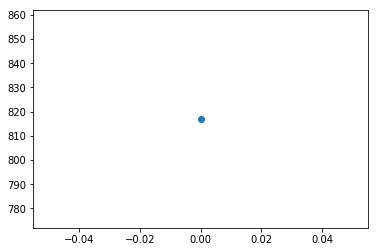

In [211]:
plt.plot(objFnValues, marker='o')

In [190]:
C = 1
clf = SVC(C,kernel='linear',gamma='auto')
clf.fit(X, Y)

/home/siddu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [191]:
clf.predict(X)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])